## Imports

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

## Get data and merge CSVs

In [2]:

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

external_csv = []
openstack_csv = []
import os
for dirname, _, filenames in os.walk(os.getcwd()):
    for filename in filenames:
        if 'external' in filename:
            fx = os.path.join(dirname, filename)
            external_csv.append(fx)            
            print(fx)
        elif 'internal' in filename:
            fx = os.path.join(dirname, filename)
            openstack_csv.append(fx)
            print(fx)

c:\Users\cupca\Desktop\Thesis\thesis-project\data\traffic\ExternalServer\CIDDS-001-external-week1.csv
c:\Users\cupca\Desktop\Thesis\thesis-project\data\traffic\ExternalServer\CIDDS-001-external-week2.csv
c:\Users\cupca\Desktop\Thesis\thesis-project\data\traffic\ExternalServer\CIDDS-001-external-week3.csv
c:\Users\cupca\Desktop\Thesis\thesis-project\data\traffic\ExternalServer\CIDDS-001-external-week4.csv
c:\Users\cupca\Desktop\Thesis\thesis-project\data\traffic\OpenStack\CIDDS-001-internal-week1.csv
c:\Users\cupca\Desktop\Thesis\thesis-project\data\traffic\OpenStack\CIDDS-001-internal-week2.csv
c:\Users\cupca\Desktop\Thesis\thesis-project\data\traffic\OpenStack\CIDDS-001-internal-week3.csv
c:\Users\cupca\Desktop\Thesis\thesis-project\data\traffic\OpenStack\CIDDS-001-internal-week4.csv


In [3]:
csvs = external_csv + openstack_csv
df = pd.concat(objs=[pd.read_csv(fp, encoding='utf-8') for fp in csvs], ignore_index=True, copy=False)
print(df.info())

C:\Users\cupca\AppData\Local\Temp\ipykernel_9012\21969850.py:2: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.concat(objs=[pd.read_csv(fp, encoding='utf-8') for fp in csvs], ignore_index=True, copy=False)
C:\Users\cupca\AppData\Local\Temp\ipykernel_9012\21969850.py:2: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.concat(objs=[pd.read_csv(fp, encoding='utf-8') for fp in csvs], ignore_index=True, copy=False)
C:\Users\cupca\AppData\Local\Temp\ipykernel_9012\21969850.py:2: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.concat(objs=[pd.read_csv(fp, encoding='utf-8') for fp in csvs], ignore_index=True, copy=False)
C:\Users\cupca\AppData\Local\Temp\ipykernel_9012\21969850.py:2: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.concat(objs=[pd.rea

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31959174 entries, 0 to 31959173
Data columns (total 16 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Date first seen    object 
 1   Duration           float64
 2   Proto              object 
 3   Src IP Addr        object 
 4   Src Pt             int64  
 5   Dst IP Addr        object 
 6   Dst Pt             float64
 7   Packets            int64  
 8   Bytes              object 
 9   Flows              int64  
 10  Flags              object 
 11  Tos                int64  
 12  class              object 
 13  attackType         object 
 14  attackID           object 
 15  attackDescription  object 
dtypes: float64(2), int64(4), object(10)
memory usage: 3.8+ GB
None


### Look at a glimpse of the dataset

In [4]:
df.head(10)

,Date first seen,Duration,Proto,Src IP Addr,Src Pt,Dst IP Addr,Dst Pt,Packets,Bytes,Flows,Flags,Tos,class,attackType,attackID,attackDescription
0,2017-03-14 17:43:57.172,81412.697,TCP,EXT_SERVER,8082,OPENSTACK_NET,56978.0,3057,2.1 M,1,.AP...,0,normal,---,---,---
1,2017-03-14 17:43:57.172,81412.697,TCP,OPENSTACK_NET,56978,EXT_SERVER,8082.0,4748,2.5 M,1,.AP...,0,normal,---,---,---
2,2017-03-14 17:43:26.135,81504.787,TCP,EXT_SERVER,8082,OPENSTACK_NET,56979.0,8639,9.1 M,1,.AP...,0,normal,---,---,---
3,2017-03-14 17:43:26.135,81504.787,TCP,OPENSTACK_NET,56979,EXT_SERVER,8082.0,12024,10.3 M,1,.AP...,0,normal,---,---,---
4,2017-03-14 18:17:09.005,82100.692,TCP,EXT_SERVER,8082,OPENSTACK_NET,51649.0,11012,27.2 M,1,.AP.S.,0,normal,---,---,---
5,2017-03-14 18:17:09.005,82100.692,TCP,OPENSTACK_NET,51649,EXT_SERVER,8082.0,14186,1.2 M,1,.AP.S.,0,normal,---,---,---
6,2017-03-14 19:46:37.327,83640.139,TCP,EXT_SERVER,8082,OPENSTACK_NET,37039.0,9974,31.9 M,1,.AP.S.,0,normal,---,---,---
7,2017-03-14 19:46:37.327,83640.139,TCP,OPENSTACK_NET,37039,EXT_SERVER,8082.0,16476,1.7 M,1,.AP.S.,0,normal,---,---,---
8,2017-03-14 19:02:42.704,86303.297,TCP,EXT_SERVER,8082,OPENSTACK_NET,48380.0,10178,25.2 M,1,.AP.S.,0,normal,---,---,---
9,2017-03-14 19:02:42.704,86303.297,TCP,OPENSTACK_NET,48380,EXT_SERVER,8082.0,14552,2.6 M,1,.AP.S.,0,normal,---,---,---


### Rename some columns

In [5]:
df = df.rename(str.lower, axis='columns')
df = df.rename(str.strip, axis='columns')
df.rename(columns={
            'date first seen': 'date_first_seen', 
            'src ip addr': 'src_ip_addr',
            'src pt': 'src_pt',
            'dst ip addr': 'dst_ip_addr',
            'dst pt': 'dst_pt',
            'attacktype': 'attack_type',
            'attackid': 'attack_id',
            'attackdescription': 'attack_description',
            'class': 'label'
        }, inplace=True)

### Look at the size of the dataset

In [6]:
df.shape

(31959174, 16)

### Solving the encoding of values > 1e7

In [7]:
def remove_million(val):
    if type(val) is str:                
        val = val.strip()
        if ' M' in val:                    
            val = val.replace('.', '')
            val = val.replace(' M', '00000')  
        if ' K' in val:                    
            val = val.replace('.', '')
            val = val.replace(' K', '000')                
        return val
    elif type(val) is int:
        return val

In [8]:
df['bytes'] = df['bytes'].apply(remove_million)
df['bytes'] = pd.to_numeric(df['bytes'], errors='raise', downcast='float')

## Analyze the categorical columns in the dataset

In [9]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
df.describe().T

,count,mean,std,min,25%,50%,75%,max
duration,31959174.00,2.42,738.08,0.00,0.00,0.00,0.03,604817.07
src_pt,31959174.00,24587.58,25075.58,0.00,80.00,8082.00,50063.00,65535.00
dst_pt,31959174.00,24369.69,25069.33,0.00,80.00,8082.00,49983.00,65535.00
packets,31959174.00,15.53,986.01,1.00,1.00,2.00,4.00,208768.00
bytes,31959174.00,19128.72,2037442.75,28.00,66.00,148.00,479.00,516200000.00
flows,31959174.00,1.00,0.00,1.00,1.00,1.00,1.00,1.00
tos,31959174.00,9.61,14.95,0.00,0.00,0.00,32.00,192.00


### Removing NA and INF values

In [10]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)

In [11]:
print("N/A rows after preproc", df.isna().any(axis=1).sum())
df.dropna(inplace=True)
print(df.shape)

N/A rows after preproc 0
(31959174, 16)


### Make the data format of TCP Flags uniform

In [12]:
df["flags"].unique()

array(['.AP...', '.AP.S.', '....S.', '.A.R..', '.APRS.', '.APRSF',
       '.AP.SF', '......', '  0xdb', '...RS.', '.A..S.', '.A..SF',
       '.A.RS.', '.A.RSF', '...R..', '.A....', '  0xd2', '.A.R.F',
       '  0xc2', '  0xda', '  0xd7', '  0x53', '  0xdf', '  0xd6',
       '  0xd3', '  0xc6', '  0x5b', '  0x5a', '  0xde', '  0x52',
       '.A...F', '.AP..F', '.APR.F', '.APR..'], dtype=object)

In [13]:
# Function to convert hexadecimal to TCP Flags format
def hex_to_tcp_flags(hex_value):
    binary_value = bin(int(hex_value,16))[2:].zfill(8)
    flags = ['C','E','U', 'A', 'P', 'R', 'S', 'F']
    tcp_flags = ''.join([flags[i] if bit == '1' else '.' for i, bit in enumerate(binary_value)])
    return tcp_flags

# Apply the function to the column in the DataFrame with the Hex values
df["flags"] = df["flags"].apply(lambda x:hex_to_tcp_flags(x) if '0x' in x else x)

# Display the updated DataFrame
print(df.head(10))

           date_first_seen  duration  proto    src_ip_addr  src_pt  \
0  2017-03-14 17:43:57.172  81412.70  TCP       EXT_SERVER    8082   
1  2017-03-14 17:43:57.172  81412.70  TCP    OPENSTACK_NET   56978   
2  2017-03-14 17:43:26.135  81504.79  TCP       EXT_SERVER    8082   
3  2017-03-14 17:43:26.135  81504.79  TCP    OPENSTACK_NET   56979   
4  2017-03-14 18:17:09.005  82100.69  TCP       EXT_SERVER    8082   
5  2017-03-14 18:17:09.005  82100.69  TCP    OPENSTACK_NET   51649   
6  2017-03-14 19:46:37.327  83640.14  TCP       EXT_SERVER    8082   
7  2017-03-14 19:46:37.327  83640.14  TCP    OPENSTACK_NET   37039   
8  2017-03-14 19:02:42.704  86303.30  TCP       EXT_SERVER    8082   
9  2017-03-14 19:02:42.704  86303.30  TCP    OPENSTACK_NET   48380   

     dst_ip_addr   dst_pt  packets       bytes  flows   flags  tos   label  \
0  OPENSTACK_NET 56978.00     3057  2100000.00      1  .AP...    0  normal   
1     EXT_SERVER  8082.00     4748  2500000.00      1  .AP...    0  norma

In [14]:
df["flags"].unique()

array(['.AP...', '.AP.S.', '....S.', '.A.R..', '.APRS.', '.APRSF',
       '.AP.SF', '......', 'CE.AP.SF', '...RS.', '.A..S.', '.A..SF',
       '.A.RS.', '.A.RSF', '...R..', '.A....', 'CE.A..S.', '.A.R.F',
       'CE....S.', 'CE.AP.S.', 'CE.A.RSF', '.E.A..SF', 'CE.APRSF',
       'CE.A.RS.', 'CE.A..SF', 'CE...RS.', '.E.AP.SF', '.E.AP.S.',
       'CE.APRS.', '.E.A..S.', '.A...F', '.AP..F', '.APR.F', '.APR..'],
      dtype=object)

In [15]:
# Left-pad each value with "." to match the maximum length 8
df['flags'] = df['flags'].apply(lambda x: '.' * (8 - len(str(x))) + str(x))

# Display the updated DataFrame
print(df["flags"].unique())

['...AP...' '...AP.S.' '......S.' '...A.R..' '...APRS.' '...APRSF'
 '...AP.SF' '........' 'CE.AP.SF' '.....RS.' '...A..S.' '...A..SF'
 '...A.RS.' '...A.RSF' '.....R..' '...A....' 'CE.A..S.' '...A.R.F'
 'CE....S.' 'CE.AP.S.' 'CE.A.RSF' '.E.A..SF' 'CE.APRSF' 'CE.A.RS.'
 'CE.A..SF' 'CE...RS.' '.E.AP.SF' '.E.AP.S.' 'CE.APRS.' '.E.A..S.'
 '...A...F' '...AP..F' '...APR.F' '...APR..']


### Convert TCP Flags to custom one-hot-encoded columns

In [16]:
print("Flags find 0xdb")
print("0xdb", df[df['flags'] == '0xdb'].index)        
print("Custom one-hot encode for the flags")

Flags find 0xdb
0xdb Index([], dtype='int64')
Custom one-hot encode for the flags


In [17]:
df['flags'] = df['flags'].str.strip()
flags_idx = df.columns.get_loc('flags')
flags_idx

10

In [18]:
data_df = df['flags'].apply(func=lambda flag_str: [0 if c == '.' else 1 for c in flag_str]).to_list()
columns_df = ['tcp_con','tcp_ech','tcp_urg', 'tcp_ack', 'tcp_psh', 'tcp_rst', 'tcp_syn', 'tcp_fin']
ohe_flag_data = pd.DataFrame(data=data_df,columns=columns_df,dtype=int)
for i, c in enumerate(ohe_flag_data.columns):
    df.insert(loc=flags_idx+i, column=c, value=ohe_flag_data[c])

In [19]:
df.head(10)

,date_first_seen,duration,proto,src_ip_addr,src_pt,dst_ip_addr,dst_pt,packets,bytes,flows,...,tcp_psh,tcp_rst,tcp_syn,tcp_fin,flags,tos,label,attack_type,attack_id,attack_description
0,2017-03-14 17:43:57.172,81412.70,TCP,EXT_SERVER,8082,OPENSTACK_NET,56978.00,3057,2100000.00,1,...,1,0,0,0,...AP...,0,normal,---,---,---
1,2017-03-14 17:43:57.172,81412.70,TCP,OPENSTACK_NET,56978,EXT_SERVER,8082.00,4748,2500000.00,1,...,1,0,0,0,...AP...,0,normal,---,---,---
2,2017-03-14 17:43:26.135,81504.79,TCP,EXT_SERVER,8082,OPENSTACK_NET,56979.00,8639,9100000.00,1,...,1,0,0,0,...AP...,0,normal,---,---,---
3,2017-03-14 17:43:26.135,81504.79,TCP,OPENSTACK_NET,56979,EXT_SERVER,8082.00,12024,10300000.00,1,...,1,0,0,0,...AP...,0,normal,---,---,---
4,2017-03-14 18:17:09.005,82100.69,TCP,EXT_SERVER,8082,OPENSTACK_NET,51649.00,11012,27200000.00,1,...,1,0,1,0,...AP.S.,0,normal,---,---,---
5,2017-03-14 18:17:09.005,82100.69,TCP,OPENSTACK_NET,51649,EXT_SERVER,8082.00,14186,1200000.00,1,...,1,0,1,0,...AP.S.,0,normal,---,---,---
6,2017-03-14 19:46:37.327,83640.14,TCP,EXT_SERVER,8082,OPENSTACK_NET,37039.00,9974,31900000.00,1,...,1,0,1,0,...AP.S.,0,normal,---,---,---
7,2017-03-14 19:46:37.327,83640.14,TCP,OPENSTACK_NET,37039,EXT_SERVER,8082.00,16476,1700000.00,1,...,1,0,1,0,...AP.S.,0,normal,---,---,---
8,2017-03-14 19:02:42.704,86303.30,TCP,EXT_SERVER,8082,OPENSTACK_NET,48380.00,10178,25200000.00,1,...,1,0,1,0,...AP.S.,0,normal,---,---,---
9,2017-03-14 19:02:42.704,86303.30,TCP,OPENSTACK_NET,48380,EXT_SERVER,8082.00,14552,2600000.00,1,...,1,0,1,0,...AP.S.,0,normal,---,---,---


In [20]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
duration,31959174.00,2.42,738.08,0.00,0.00,0.00,0.03,604817.07
src_pt,31959174.00,24587.58,25075.58,0.00,80.00,8082.00,50063.00,65535.00
dst_pt,31959174.00,24369.69,25069.33,0.00,80.00,8082.00,49983.00,65535.00
packets,31959174.00,15.53,986.01,1.00,1.00,2.00,4.00,208768.00
bytes,31959174.00,19128.72,2037442.75,28.00,66.00,148.00,479.00,516200000.00
flows,31959174.00,1.00,0.00,1.00,1.00,1.00,1.00,1.00
tcp_con,31959174.00,0.00,0.03,0.00,0.00,0.00,0.00,1.00
tcp_ech,31959174.00,0.00,0.03,0.00,0.00,0.00,0.00,1.00
tcp_urg,31959174.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
tcp_ack,31959174.00,0.85,0.36,0.00,1.00,1.00,1.00,1.00


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31959174 entries, 0 to 31959173
Data columns (total 24 columns):
 #   Column              Dtype  
---  ------              -----  
 0   date_first_seen     object 
 1   duration            float64
 2   proto               object 
 3   src_ip_addr         object 
 4   src_pt              int64  
 5   dst_ip_addr         object 
 6   dst_pt              float64
 7   packets             int64  
 8   bytes               float32
 9   flows               int64  
 10  tcp_con             int32  
 11  tcp_ech             int32  
 12  tcp_urg             int32  
 13  tcp_ack             int32  
 14  tcp_psh             int32  
 15  tcp_rst             int32  
 16  tcp_syn             int32  
 17  tcp_fin             int32  
 18  flags               object 
 19  tos                 int64  
 20  label               object 
 21  attack_type         object 
 22  attack_id           object 
 23  attack_description  object 
dtypes: float32(1), float64

### Data formatting for some categorical columns

In [22]:
print("Protocol columns before preprocessing: ", df["proto"].unique())
df["proto"] = df["proto"].str.strip()
print("Protocol columns after preprocessing: ", df["proto"].unique())


Protocol columns before preprocessing:  ['TCP  ' 'UDP  ' 'ICMP ' 'GRE  ' 'IGMP ']
Protocol columns after preprocessing:  ['TCP' 'UDP' 'ICMP' 'GRE' 'IGMP']


In [23]:
df = df.drop("flags",axis=1)
df.columns.to_list()
df['attack_type'] = df['attack_type'].replace({'---': 'benign'})
df['attack_id'] = df['attack_id'].replace({'---': 0})
df['attack_id'] = df['attack_id'].astype(np.int32)

### Removing duplicated values

In [24]:
df.shape

(31959174, 23)

In [27]:
dupli = df.duplicated().sum()
if dupli > 0:
    print(dupli, "fully duplicate rows")
    df.drop_duplicates(inplace=True)
df.shape

481978 fully duplicate rows


(31477196, 23)

### Get the categorical and numerical columns of the dataset to analyze them further

In [28]:
cat_cols= df.select_dtypes(include=['object']).columns
num_cols = df.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables:")
print(cat_cols)
print("Numerical Variables:")
print(num_cols)

Categorical Variables:
Index(['date_first_seen', 'proto', 'src_ip_addr', 'dst_ip_addr', 'label',
       'attack_type', 'attack_description'],
      dtype='object')
Numerical Variables:
['duration', 'src_pt', 'dst_pt', 'packets', 'bytes', 'flows', 'tcp_con', 'tcp_ech', 'tcp_urg', 'tcp_ack', 'tcp_psh', 'tcp_rst', 'tcp_syn', 'tcp_fin', 'tos', 'attack_id']


### Sample the data based on the https://www.mdpi.com/2076-3417/11/4/1674 paper. Getting only data from Openstack week 1

2,535,456 flows between 2:18:05 p.m., 17 March 2017
and 5:42:17 p.m., 20 March 2017 was selected
2017-03-14 17:43:26.135	

In [32]:
df_cleaned = df.loc[(df["date_first_seen"]>="2017-03-17 14:18:05") & (df["date_first_seen"]<="2017-03-20 17:42:17")]

In [33]:
df_cleaned.describe().T

,count,mean,std,min,25%,50%,75%,max
duration,2555018.00,3.24,213.79,0.00,0.00,0.00,0.03,27459.49
src_pt,2555018.00,24374.81,24781.56,0.00,80.00,8082.00,49713.00,65535.00
dst_pt,2555018.00,24088.02,24787.71,0.00,80.00,8000.00,49618.00,65535.00
packets,2555018.00,14.15,942.83,1.00,1.00,2.00,4.00,203467.00
bytes,2555018.00,16729.23,1952825.50,28.00,66.00,154.00,479.00,516200000.00
flows,2555018.00,1.00,0.00,1.00,1.00,1.00,1.00,1.00
tcp_con,2555018.00,0.00,0.01,0.00,0.00,0.00,0.00,1.00
tcp_ech,2555018.00,0.00,0.01,0.00,0.00,0.00,0.00,1.00
tcp_urg,2555018.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
tcp_ack,2555018.00,0.85,0.35,0.00,1.00,1.00,1.00,1.00


### Univariate Analysis

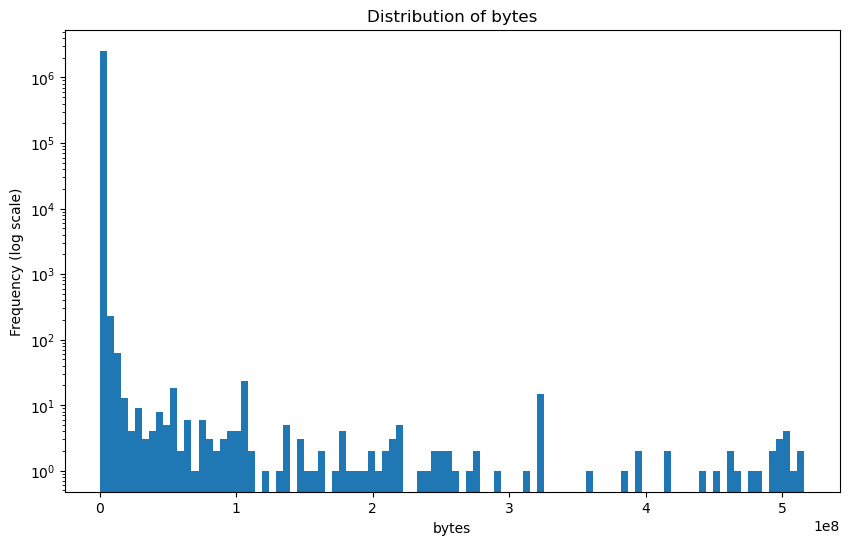

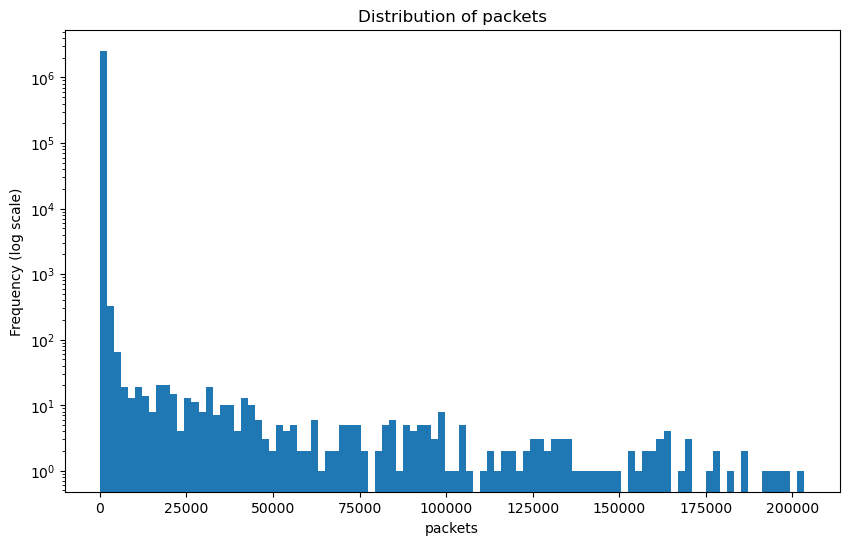

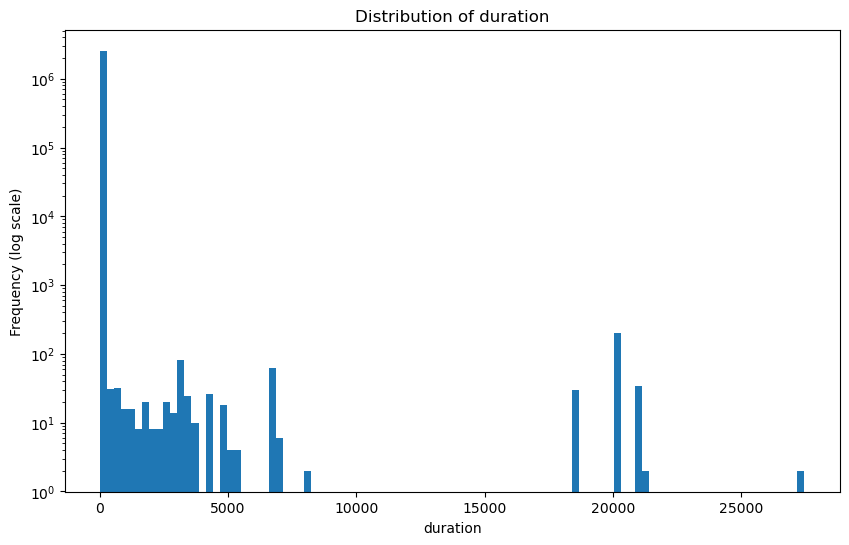

In [34]:
univars = ['bytes', 'packets', 'duration']
# Set the figure size
for u in univars:
    plt.figure(figsize=(10, 6))
    # Generate histogram for bytes using a logarithmic scale
    plt.hist(x=df_cleaned[u], bins=100, range=(df_cleaned[u].min(), df_cleaned[u].max()), log=True)
    # Set the x-axis label
    plt.xlabel(u)
    # Set the y-axis label
    plt.ylabel('Frequency (log scale)')
    # Set the title
    plt.title('Distribution of ' + u)
    # Show the plot
    plt.show()

In [39]:
plt.figure(figsize=(12, 18))
sns.pairplot(data=df_cleaned[['bytes', 'packets', 'duration',]].sample(10000))
plt.show()

c:\Users\cupca\anaconda3\envs\thesis\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\cupca\anaconda3\envs\thesis\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\cupca\anaconda3\envs\thesis\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\cupca\anaconda3\envs\thesis\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Ca

KeyboardInterrupt: 

Error in callback <function _draw_all_if_interactive at 0x00000159A3042DD0> (for post_execute):


KeyboardInterrupt: 

<Figure size 1200x1800 with 0 Axes>

### Dropping the metadata that is not needed

In [ ]:
df = df.drop(labels=['date_first_seen', 'src_ip_addr', 'src_pt', 'dst_ip_addr', 'dst_pt','attack_description','flows'], axis=1)